In [ ]:
# !pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
# !pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dataset = pd.read_csv('fix_dataset.csv')
dataset

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,PREV_DAYS_ENTRY_PAYMENT_MEAN,PREV_AMT_INSTALMENT_MEAN,PREV_AMT_PAYMENT_MEAN,PREV_DAYS_DIFF_MEAN,PREV_DAYS_DIFF_MAX,PREV_DAYS_DIFF_MIN,PREV_AMT_DIFF_MEAN,PREV_AMT_DIFF_MAX,PREV_AMT_DIFF_MIN,TARGET
0,100002.0,0.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,-315.421053,11559.247105,11559.247105,20.421053,31.0,12.0,0.000000,0.000,0.000,1.0
1,100003.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,-1385.320000,64754.586000,64754.586000,7.160000,14.0,1.0,0.000000,0.000,0.000,0.0
2,100004.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,-761.666667,7096.155000,7096.155000,7.666667,11.0,3.0,0.000000,0.000,0.000,0.0
3,100006.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,-271.625000,62947.088438,62947.088438,19.375000,77.0,1.0,0.000000,0.000,0.000,0.0
4,100007.0,0.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,-1032.242424,12666.444545,12214.060227,3.636364,31.0,-12.0,452.384318,22655.655,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,...,-156.285714,7492.924286,7492.924286,36.285714,46.0,8.0,0.000000,0.000,0.000,0.0
307507,456252.0,0.0,0.0,1.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,...,-2393.833333,10069.867500,10069.867500,2.833333,11.0,-3.0,0.000000,0.000,0.000,0.0
307508,456253.0,0.0,0.0,1.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,...,-2387.428571,4399.707857,4115.915357,14.500000,51.0,-9.0,283.792500,3945.825,0.000,0.0
307509,456254.0,0.0,0.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,...,-161.263158,10239.832895,10239.832895,19.000000,31.0,8.0,0.000000,0.000,0.000,1.0


In [ ]:
X = dataset.drop(columns=['TARGET'], axis = 1)
y = dataset['TARGET']


print('X data shape: ', X.shape)
print('y data shape: ', y.shape)

X data shape:  (307511, 447)
y data shape:  (307511,)


In [ ]:
dataset.TARGET.value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = dataset.drop('TARGET', axis=1)
y = dataset['TARGET']

# Hitung jumlah sampel untuk setiap kelas sebelum oversampling
print("Jumlah sampel per kelas sebelum SMOTE:")
print(y.value_counts())

# Inisialisasi objek SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Lakukan oversampling pada data training
# Penting untuk hanya menerapkan SMOTE pada data training untuk menghindari data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan SMOTE hanya pada data training
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hitung jumlah sampel untuk setiap kelas setelah oversampling
print("\nJumlah sampel per kelas setelah SMOTE (pada data training):")
print(pd.Series(y_train_resampled).value_counts())

# X_train_oversampled dan y_train_oversampled sekarang berisi data training yang sudah di-oversample
# X_test dan y_test adalah data testing yang tidak tersentuh oleh SMOTE

Jumlah sampel per kelas sebelum SMOTE:
0.0    282686
1.0     24825
Name: TARGET, dtype: int64

Jumlah sampel per kelas setelah SMOTE (pada data training):
0.0    226148
1.0    226148
Name: TARGET, dtype: int64


In [ ]:
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance.head(150))

                                               feature  importance
73                                       CODE_GENDER_F    0.039379
74                                       CODE_GENDER_M    0.033460
191                      HOUSETYPE_MODE_block of flats    0.033414
201                             EMERGENCYSTATE_MODE_No    0.024898
93   NAME_EDUCATION_TYPE_Secondary / secondary special    0.024611
..                                                 ...         ...
401                  PREV_NAME_YIELD_GROUP_middle_MEAN    0.002056
263                         PREV_AMT_DOWN_PAYMENT_MEAN    0.002056
277                               PREV_CNT_PAYMENT_SUM    0.002046
125                WEEKDAY_APPR_PROCESS_START_SATURDAY    0.002039
276                              PREV_CNT_PAYMENT_MEAN    0.002037

[150 rows x 2 columns]


In [ ]:
feature = feature_importance['feature'].head(150).tolist()
feature

['CODE_GENDER_F',
 'CODE_GENDER_M',
 'HOUSETYPE_MODE_block of flats',
 'EMERGENCYSTATE_MODE_No',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Married',
 'NAME_INCOME_TYPE_Working',
 'EXT_SOURCE_2',
 'FLAG_PHONE',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE_Higher education',
 'WALLSMATERIAL_MODE_Panel',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT',
 'PREV_NAME_CLIENT_TYPE_New_MEAN',
 'REG_CITY_NOT_WORK_CITY',
 'PREV_AMT_DIFF_MAX',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_3',
 'PREV_AMT_DIFF_MEAN',
 'FONDKAPREMONT_MODE_reg oper account',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'WALLSMATERIAL_MODE_Stone, brick',
 'REGION_RATING_CLIENT_W_CITY',
 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN',
 'CNT_CHILDREN',
 'FLAG_OWN_REALTY',
 'PREV_CODE_REJECT_REASON_XAP_MEAN',
 'NAME_INCOME_TYPE_Commercial associate',
 'PREV_NAME_PRODUCT_TYPE_walk-in_MEAN',
 'OCCUPATION_TYPE_Laborers',
 'LIVE_CITY_NOT_WORK_CITY',
 'PREV_NAME_YIELD_GROUP_high_MEAN',
 'NAME_FAMILY_STATUS_Si

In [ ]:
selected_features = [col for col in feature if col in X_train_resampled.columns]
X_train_resampled = X_train_resampled[selected_features]
X_train_resampled.head()

,CODE_GENDER_F,CODE_GENDER_M,HOUSETYPE_MODE_block of flats,EMERGENCYSTATE_MODE_No,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_INCOME_TYPE_Working,EXT_SOURCE_2,FLAG_PHONE,FLAG_OWN_CAR,...,HOUR_APPR_PROCESS_START,PREV_AMT_CREDIT_MEAN,OCCUPATION_TYPE_Sales staff,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_CNT_INSTALMENT_MEAN,PREV_NAME_YIELD_GROUP_middle_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,WEEKDAY_APPR_PROCESS_START_SATURDAY,PREV_CNT_PAYMENT_MEAN
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.289573,0.0,0.0,...,10.0,138673.8000,0.0,0.20,8.294118,0.4,2826.0,34.0,0.0,6.800000
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.514261,0.0,1.0,...,13.0,90423.9000,0.0,0.00,9.066667,0.6,5056.5,48.0,0.0,12.000000
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.486906,1.0,0.0,...,5.0,45598.5000,0.0,0.00,4.000000,0.0,4905.0,4.0,0.0,4.000000
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.675705,1.0,0.0,...,10.0,126723.9375,0.0,0.25,38.702381,0.5,3600.0,122.0,0.0,17.428571
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154565,0.0,0.0,...,5.0,13965.7500,0.0,0.00,11.916667,0.0,2808.0,12.0,0.0,12.000000


In [ ]:
# Scaling/standarisasi menggunakan standardscaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)     # hanya fit di train
X_test_scaled = scaler.transform(X_test[selected_features])           # transform test pakai mean & std dari train

# XGBOOST

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score, precision_score
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train_scaled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

print(f"Accuracy (XGBoost): {accuracy_xgb}")
print(f"ROC-AUC (XGBoost): {roc_auc_xgb}")
print(f"Recall (XGBoost): {recall_xgb}")
print(f"Precision (XGBoost): {precision_xgb}")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):\n", cm_xgb)

Accuracy (XGBoost): 0.9183291871941206
ROC-AUC (XGBoost): 0.5239221830752229
Recall (XGBoost): 0.05357502517623364
Precision (XGBoost): 0.45084745762711864
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56538
         1.0       0.45      0.05      0.10      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.52      0.53     61503
weighted avg       0.88      0.92      0.89     61503

Confusion Matrix (XGBoost):
 [[56214   324]
 [ 4699   266]]


# Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")
print(f"ROC-AUC (Random Forest): {roc_auc_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"Precision (Random Forest): {precision_rf}")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm_rf)

Accuracy (Random Forest): 0.9193535274702047
ROC-AUC (Random Forest): 0.5008709699724454
Recall (Random Forest): 0.0018126888217522659
Precision (Random Forest): 0.6923076923076923
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.69      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.81      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503

Confusion Matrix (Random Forest):
 [[56534     4]
 [ 4956     9]]


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Fit model pada data latih
svm_model.fit(X_train_scaled, y_train_resampled)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # untuk ROC-AUC

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)

# Cetak hasil
print(f"Accuracy (SVM): {accuracy_svm}")
print(f"ROC-AUC (SVM): {roc_auc_svm}")
print(f"Recall (SVM): {recall_svm}")
print(f"Precision (SVM): {precision_svm}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):\n", cm_svm)

# Stacking Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix

# Base models
estimators = [
#     ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-model
final_estimator = LogisticRegression()

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    passthrough=True,  # optional: include base model features in final model
    n_jobs=-1
)

# Fit stacking model
stack_model.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred_stack = stack_model.predict(X_test_scaled)
y_proba_stack = stack_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
recall_stack = recall_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)

# Print metrics
print(f"Accuracy (Stacking): {accuracy_stack}")
print(f"ROC-AUC (Stacking): {roc_auc_stack}")
print(f"Recall (Stacking): {recall_stack}")
print(f"Precision (Stacking): {precision_stack}")
print(classification_report(y_test, y_pred_stack))

# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
print("Confusion Matrix (Stacking):\n", cm_stack)


# Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, recall_score, precision_score
)

# Definisikan model-model base
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)  # penting: SVC butuh probability=True untuk ROC

# Buat voting ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('svc', svm_clf)
    ],
    voting='soft'  # Gunakan 'soft' voting agar bisa dihitung ROC-AUC
)

# Fit model ke data latih
voting_clf.fit(X_train_scaled, y_train_resampled)

# Prediksi
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluasi
accuracy_voting = accuracy_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test_scaled)[:, 1])
recall_voting = recall_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)

print(f"Accuracy (Voting Ensemble): {accuracy_voting}")
print(f"ROC-AUC (Voting Ensemble): {roc_auc_voting}")
print(f"Recall (Voting Ensemble): {recall_voting}")
print(f"Precision (Voting Ensemble): {precision_voting}")
print(classification_report(y_test, y_pred_voting))

cm_voting = confusion_matrix(y_test, y_pred_voting)
print("Confusion Matrix (Voting Ensemble):\n", cm_voting)

---

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

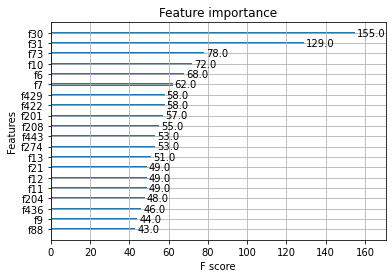

In [ ]:
# import xgboost as xgb
# model = xgb.XGBClassifier()
# model.fit(X_train_scaled, y_train_resampled)

# xgb.plot_importance(model, max_num_features=20)

In [ ]:
# import pandas as pd

# # Ambil nama kolom asli SEBELUM di-scale
# feature_names = X_train.columns

# # Ambil feature importance dari model
# importances = model.feature_importances_

# # Buat dataframe ranking fitur
# feature_importance_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': importances
# }).sort_values(by='importance', ascending=False)

# # Tampilkan 20 fitur terpenting
# top_features = feature_importance_df.head(20)
# print(top_features)

# # Kalau mau ambil sebagai list:
# top_feature_names = top_features['feature'].tolist()
# print(top_feature_names)

                                               feature  importance
201                             EMERGENCYSTATE_MODE_No    0.067572
93   NAME_EDUCATION_TYPE_Secondary / secondary special    0.066807
18                                          FLAG_PHONE    0.061427
81                       NAME_TYPE_SUITE_Unaccompanied    0.047922
88                            NAME_INCOME_TYPE_Working    0.047614
124                  WEEKDAY_APPR_PROCESS_START_MONDAY    0.042345
95                          NAME_FAMILY_STATUS_Married    0.041155
48                                     FLAG_DOCUMENT_3    0.039514
3                                      FLAG_OWN_REALTY    0.035362
338                     PREV_NAME_CLIENT_TYPE_New_MEAN    0.034048
73                                       CODE_GENDER_F    0.031903
198                           WALLSMATERIAL_MODE_Panel    0.031452
2                                         FLAG_OWN_CAR    0.029351
4                                         CNT_CHILDREN    0.02